<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-thư-viện" data-toc-modified-id="Import-thư-viện-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import thư viện</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#Khám-phá,-tiền-xử-lí-dữ-liệu" data-toc-modified-id="Khám-phá,-tiền-xử-lí-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Khám phá, tiền xử lí dữ liệu</a></span></li><li><span><a href="#Các-câu-hỏi-từ-dữ-liệu" data-toc-modified-id="Các-câu-hỏi-từ-dữ-liệu-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Các câu hỏi từ dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Xây-dựng-ứng-dụng-về-các-chủ-đề-nào-là-tốt?" data-toc-modified-id="Xây-dựng-ứng-dụng-về-các-chủ-đề-nào-là-tốt?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Xây dựng ứng dụng về các chủ đề nào là tốt?</a></span></li><li><span><a href="#Xây-dựng-ứng-dụng-Free-hay-Paid." data-toc-modified-id="Xây-dựng-ứng-dụng-Free-hay-Paid.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Xây dựng ứng dụng Free hay Paid.</a></span></li><li><span><a href="#Yếu-tố-ảnh-hưởng-đến-Install" data-toc-modified-id="Yếu-tố-ảnh-hưởng-đến-Install-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Yếu tố ảnh hưởng đến Install</a></span></li><li><span><a href="#Tìm-những-ứng-dụng-được-đánh-giá-tốt-thông-qua-Review-của-khách-hàng" data-toc-modified-id="Tìm-những-ứng-dụng-được-đánh-giá-tốt-thông-qua-Review-của-khách-hàng-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Tìm những ứng dụng được đánh giá tốt thông qua Review của khách hàng</a></span></li></ul></li></ul></div>

# Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

# Thu thập dữ liệu

- Chủ đề của dữ liệu: `Các ứng dụng trên Google Play Store`

Các thông tin về ứng dụng trên Google Play Store có thể thúc đẩy các doanh nghiệp sản xuất các ứng dụng thành công hơn. Ngoài ra, những thông tin này còn có thể giúp các nhà phát triển hiểu thêm và nắm bắt thị trường Android.

- Dữ liệu được lấy từ kaggle: https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv 

- Dữ liệu được thu thập như thế nào?

Dữ liệu được lấy trên Google Play Store

- Lấy dữ liệu file `googleplaystore.csv`

In [2]:
df = pd.read_csv("data\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Khám phá, tiền xử lí dữ liệu

- Dữ liệu có bao nhiêu dòng, cột?

In [3]:
nrow = df.shape[0]
ncol = df.shape[1]

In [4]:
print("Dữ liệu có {} dòng".format(nrow))
print("Dữ liệu có {} cột".format(ncol))

Dữ liệu có 10841 dòng
Dữ liệu có 13 cột


- Ý nghĩa của mỗi dòng là gì?`

Mỗi dòng tương ứng với mỗi App với các dữ liệu về tên app, loại app, rating, lượng review, kích cỡ, giá,...

- Dữ liệu có các dòng bị lặp không?

In [5]:
nduplicated = df.duplicated().sum()
print("Dữ liệu có {} dòng bị lặp".format(nduplicated))

Dữ liệu có 483 dòng bị lặp


- Có cột nào bị mất dữ liệu không?

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
df.agg([missing_ratio])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
missing_ratio,0.0,0.009224,13.596532,0.0,0.0,0.0,0.009224,0.0,0.0,0.009224,0.0,0.073794,0.018448


- Xử lý các dòng, cột bị mất dữ liệu
    + Dữ liệu bị thiếu ở cột `Rating` sẽ được điền bằng trung bình của các app trong cùng một `Category`.
    + Dữ liệu bị thiếu ở cột `Type` sẽ điền dựa vào cột `Price` vì cột này không thiếu.
    + Hai cột `Category` và `Genre` thì khó điền vì phụ thuộc nhiều yếu tố, không thể chỉ xử lý đơn giản. Thêm vào đó dữ liệu thiếu này chỉ tập trung vào số ít các dòng nên có thể xóa bỏ các dòng này.
    + Hai cột `Current Ver` và `Android Ver` thì không quá cần thiết trong quá trình phân tích của nhóm nên dữ liệu có thể thiếu không sao.

In [7]:
# Điền dữ liệu thiếu vào cột Rating
temp_df = df.groupby("Category")["Rating"].mean()
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
temp_df.rename(columns={'Rating':'Rating_mean'}, inplace=True)
new_df = temp_df.merge(df, how = "right", on = "Category")
new_df.loc[new_df["Rating"].isna(), "Rating"] = new_df.loc[new_df["Rating"].isna(), "Rating_mean"]
df["Rating"] = new_df["Rating"]

In [8]:
# Điền dữ liệu thiếu vào cột Type
df.loc[df["Price"] == "0", "Type"] = "Free"
df.loc[df["Price"] != "0", "Type"] = "Paid"

# Xóa dòng có Category thiếu, có vẻ chỉ là 1 dòng nhiễu, không quan trọng
df = df[~df["Category"].isna()]

In [9]:
def missing_ratio(s):
    return s.isna().mean() * 100
df.agg([missing_ratio])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073801,0.01845


Sau khi thực hiện xong các bước này thì ta thấy những cột quan trọng đã không còn thiếu dữ liệu nữa!

- Mô tả về ý nghĩa của mỗi cột

|Tên cột|Ý nghĩa của cột|
|---|---|
|App|Tên ứng dụng|
|Category|Thể loại của ứng dụng|
|Rating|Đánh giá của người dùng về ứng dụng|
|Reviews|Số lượng đánh giá của người dùng về ứng dụng|
|Size|Kích thước của ứng dụng|
|Installs|Số lượt tải xuống / cài đặt của người dùng cho ứng dụng|
|Type|Ứng dụng trả phí hay miễn phí|
|Price|Giá của ứng dụng|
|Content Rating|Nhóm tuổi mà ứng dụng nhắm đến|
|Genres|Ứng dụng thuộc nhiều thể loại (ngoài thể loại chính của nó).|
|Last Updated|Ngày cập nhật của ứng dụng trên Google Play Store|
|Current Ver|Phiên bản hiện tại của ứng dụng trên Google Play Store|
|Android Ver|Phiên bản Android tối thiểu của máy|




- Mỗi cột có kiểu dữ liệu gì?

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

`Nhận xét`:
- Cột Size, Install, Price cần chuyển cột này về kiểu dữ liệu dạng số.
- Cột Last Updated cần chuyển cột này về kiểu dữ liệu datetime.

- Với mỗi cột dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [11]:
df["Size"] = df["Size"].apply(lambda x: x.replace("M", "e+6").replace("k","e+3").replace("Varies with device","0"))
df["Size"] = pd.to_numeric(df["Size"])

In [12]:
df["Installs"] = df["Installs"].apply(lambda x: x.replace("+", "").replace(",",""))
df["Installs"] = pd.to_numeric(df["Installs"])

In [13]:
df["Price"] = df["Price"].apply(lambda x: x.replace("$", ""))
df["Price"] = pd.to_numeric(df["Price"])

In [14]:
num_col_df = df.select_dtypes(exclude= 'object')
num_col_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,4.190454,4.441529e+05,1.815209e+07,1.546434e+07,1.027368
std,0.480075,2.927761e+06,2.217061e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.047411,3.800000e+01,2.600000e+06,1.000000e+03,0.000000
50%,4.259664,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


- Sự phân bố các cột numeric

<ipython-input-15-2f9b1b529246>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df.describe().columns].hist(ax = ax)


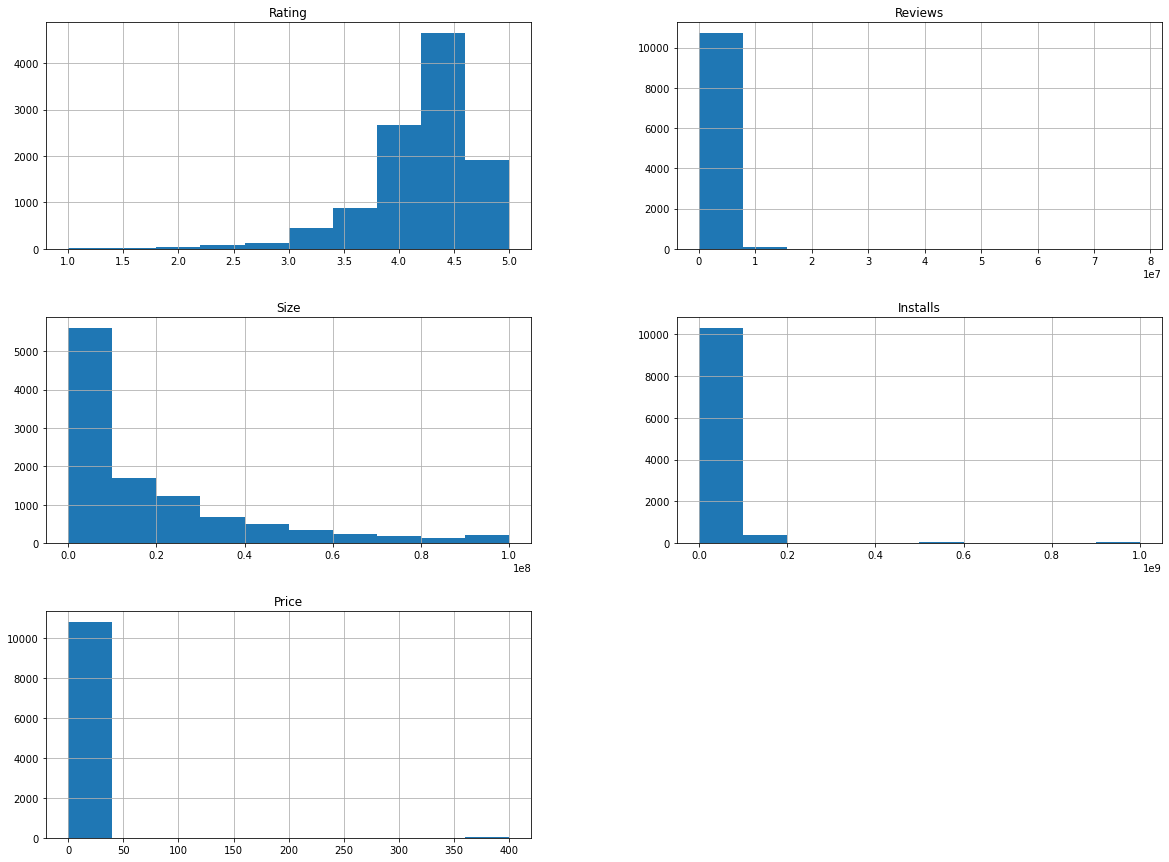

In [15]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df[df.describe().columns].hist(ax = ax)
plt.show()

- Chuyển cột Last Updated sang kiểu datetime

In [16]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format = '%d-%b-%y', errors='coerce')

- Với mỗi cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [17]:
cate_col_df = df.select_dtypes(include= 'object')
cate_col_df.describe()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,10840,10840,10840,10840,10840,10832,10838
unique,9659,33,2,6,119,2783,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up
freq,9,1972,10040,8714,842,1459,2451


# Các câu hỏi từ dữ liệu

## Xây dựng ứng dụng về các chủ đề nào là tốt?

- Các ứng dụng hiện này theo chủ đề nào là nhiều?

<AxesSubplot:xlabel='count', ylabel='Category'>

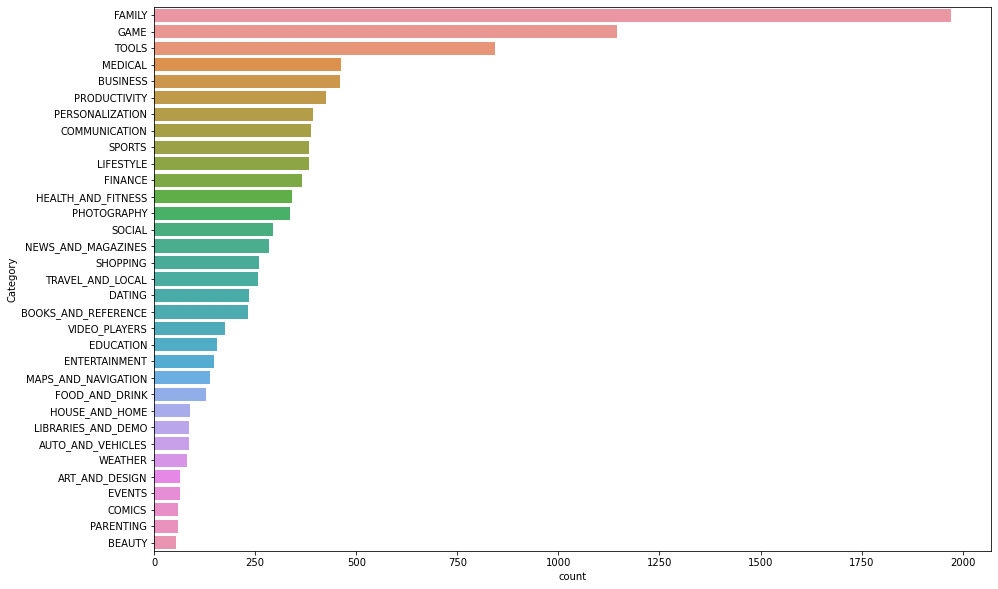

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(y = "Category", data = df, order = df['Category'].value_counts().index)

- Lượng cài đặt ứng dụng với từng chủ đề là bao nhiêu?

<BarContainer object of 33 artists>

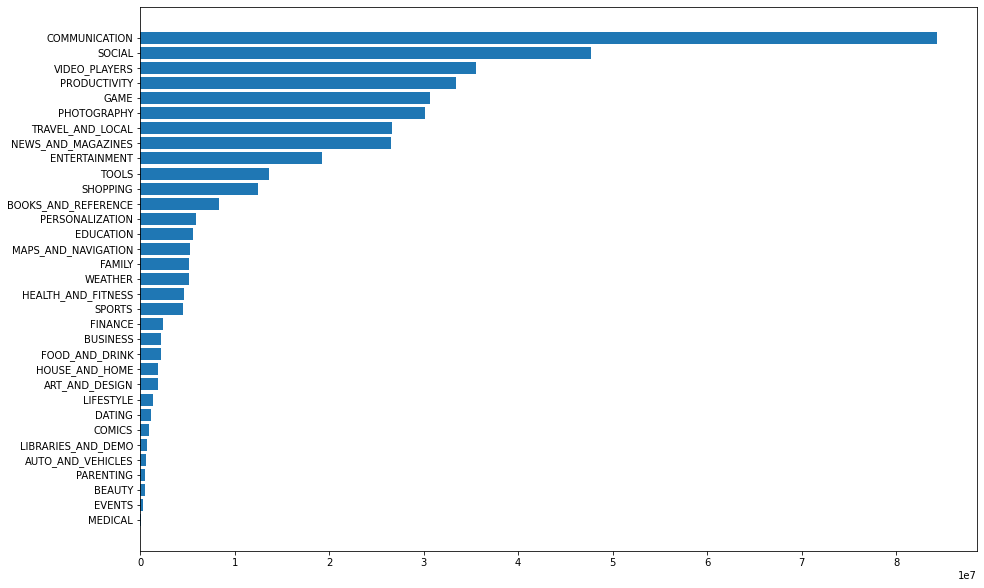

In [19]:
temp_df = df.groupby("Category")["Installs"].mean()
temp_df = temp_df.sort_values(ascending = True)
plt.figure(figsize=(15,10))
plt.barh(temp_df.index, temp_df)

- Lấy top 5 `Category` được cài nhiều mỗi năm

In [20]:
year_df = df.copy()
year_df["Year"] = df["Last Updated"].dt.year
###
g = year_df.groupby("Year")
res = g.apply(lambda x: x.reset_index().sort_values(by = "Installs", ascending=False).drop_duplicates(subset="Category").head(5)["Category"])
top5_category_year_df = pd.DataFrame(res)
top5_category_year_df = top5_category_year_df.reset_index().drop("level_1", axis=1)
top5_category_year_df.index = np.concatenate([[1],np.arange(0, 40)%5 + 1])
top5_category_year_df = top5_category_year_df.reset_index().rename(columns={'index': 'Top'})
top5_category_year_df = top5_category_year_df.pivot(index='Top', columns='Year', values='Category')
top5_category_year_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Top,,,,,,,,,
1,FAMILY,TOOLS,LIBRARIES_AND_DEMO,FAMILY,FAMILY,GAME,VIDEO_PLAYERS,PHOTOGRAPHY,NEWS_AND_MAGAZINES
2,NaN,GAME,GAME,GAME,PERSONALIZATION,BOOKS_AND_REFERENCE,GAME,GAME,FAMILY
3,NaN,LIBRARIES_AND_DEMO,HEALTH_AND_FITNESS,LIBRARIES_AND_DEMO,TOOLS,PHOTOGRAPHY,TOOLS,TOOLS,VIDEO_PLAYERS
4,NaN,BOOKS_AND_REFERENCE,FAMILY,PRODUCTIVITY,GAME,VIDEO_PLAYERS,PRODUCTIVITY,FAMILY,PHOTOGRAPHY
5,NaN,LIFESTYLE,PHOTOGRAPHY,SPORTS,COMMUNICATION,FAMILY,FAMILY,SPORTS,PRODUCTIVITY


- Lấy top 5 `App` được cài đặt nhiều ứng với mỗi `Category`

In [21]:
g = df.groupby("Category")
res = g.apply(lambda x: x.reset_index().sort_values(by = "Installs", ascending=False).drop_duplicates(subset="App").head(5)["App"])
top5_app_category_df = pd.DataFrame(res)
top5_app_category_df = top5_app_category_df.reset_index().drop("level_1", axis=1)
top5_app_category_df.index = np.arange(0, 165)%5 + 1
top5_app_category_df = top5_app_category_df.reset_index().rename(columns={'index': 'Top'})
top5_app_category_df = top5_app_category_df.pivot(index='Top', columns='Category', values='App')
top5_app_category_df[["COMMUNICATION", "SOCIAL", "VIDEO_PLAYERS", "PRODUCTIVITY", "GAME", "PHOTOGRAPHY"]]

Category,COMMUNICATION,SOCIAL,VIDEO_PLAYERS,PRODUCTIVITY,GAME,PHOTOGRAPHY
Top,,,,,,
1,Messenger – Text and Video Chat for Free,Facebook,YouTube,Google Drive,Subway Surfers,Google Photos
2,Skype - free IM & video calls,Google+,Google Play Movies & TV,Microsoft Word,Temple Run 2,"Z Camera - Photo Editor, Beauty Selfie, Collage"
3,Google Chrome: Fast & Secure,Instagram,MX Player,Google Calendar,Candy Crush Saga,YouCam Perfect - Selfie Photo Editor
4,Hangouts,Snapchat,"VideoShow-Video Editor, Video Maker, Beauty Ca...",Dropbox,Pou,BeautyPlus - Easy Photo Editor & Selfie Camera
5,WhatsApp Messenger,Facebook Lite,VivaVideo - Video Editor & Photo Movie,Cloud Print,My Talking Tom,YouCam Makeup - Magic Selfie Makeovers


- Trong thể loại `GAME`

<AxesSubplot:xlabel='count', ylabel='Genres'>

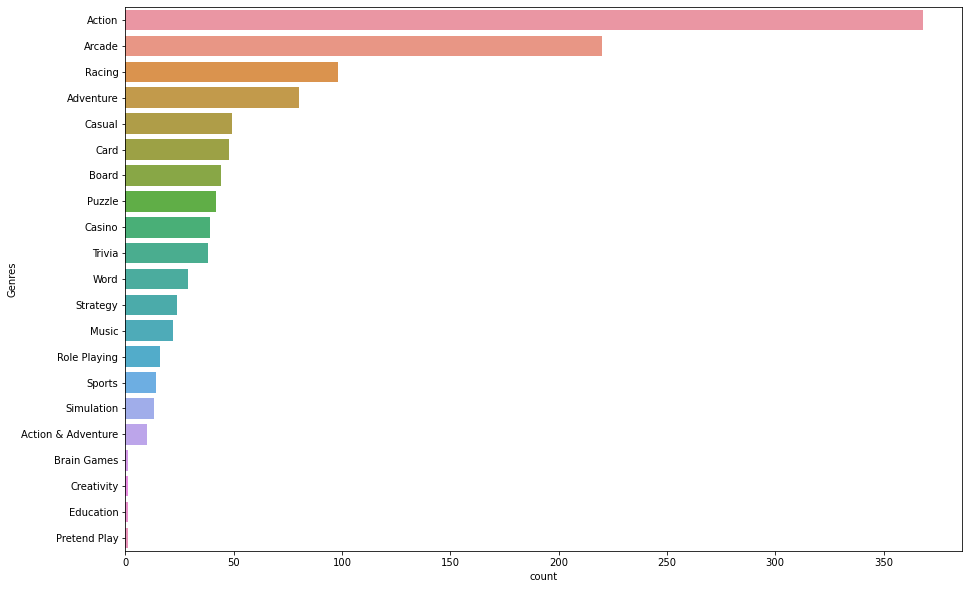

In [22]:
cate_game_sr = df[df["Category"] =="GAME"]["Genres"]
cate_game_sr = cate_game_sr.map(lambda x: x.split(";"))
cate_game_sr = cate_game_sr.explode("Genres")
plt.figure(figsize=(15,10))
sns.countplot(y = cate_game_sr, order = cate_game_sr.value_counts().index)

## Xây dựng ứng dụng Free hay Paid.

- So sánh Rating, Reviews, Size, Installs, Price, Count

In [23]:
type_grp=df.groupby('Type')
type_grp=type_grp.mean()
type_grp['Count']=df.groupby('Type')['App'].count()
type_grp

,Rating,Reviews,Size,Installs,Price,Count
Type,,,,,,
Free,4.185228,478613.420618,1.820618e+07,1.668929e+07,0.000000,10040
Paid,4.256044,11673.312500,1.747326e+07,9.119510e+04,13.920837,800


- Với mỗi `Category` thì ta nên xây dựng ứng dụng Free hay Paid là hợp lí?

Ta sẽ đánh giá qua tỉ lệ `Rating` trung bình ứng với mỗi `Category`

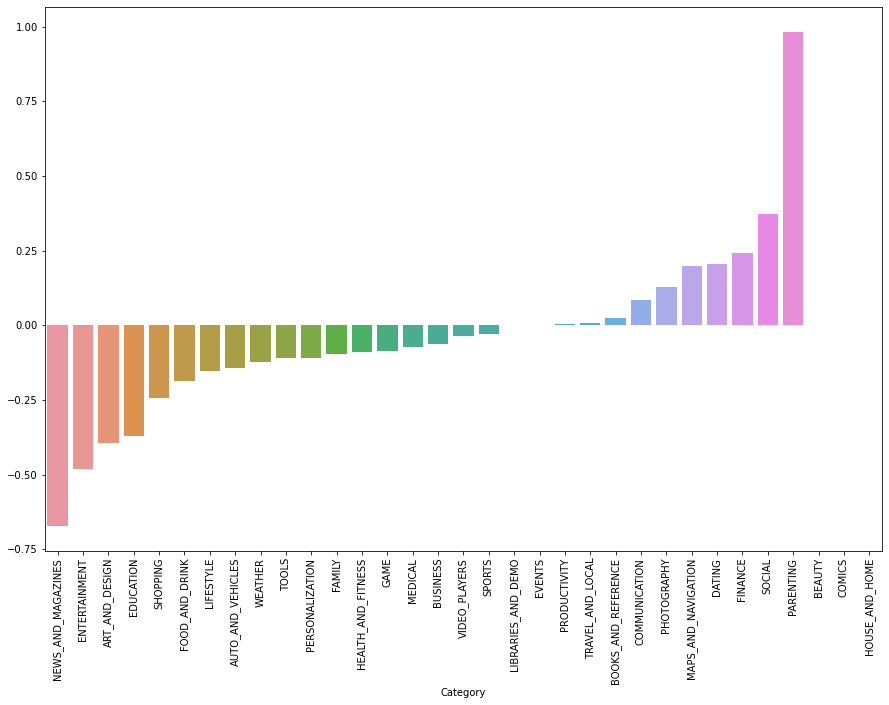

In [24]:
plt.figure(figsize=(15,10))
temp_df_1 = df[df["Type"] == "Free"].groupby("Category")["Rating"].mean()
temp_df_2 = df[df["Type"] == "Paid"].groupby("Category")["Rating"].mean()
temp_df = temp_df_1 - temp_df_2
temp_df= temp_df.sort_values()
sns.barplot(x=temp_df.index, y=temp_df.values)
plt.xticks(rotation=90)
plt.show()

## Yếu tố ảnh hưởng đến Install

- Vẽ biểu đồ quan sát `Rating`, `Reviews`, `Size`, `Price` ảnh hưởng đến `Installs` như thế nào?

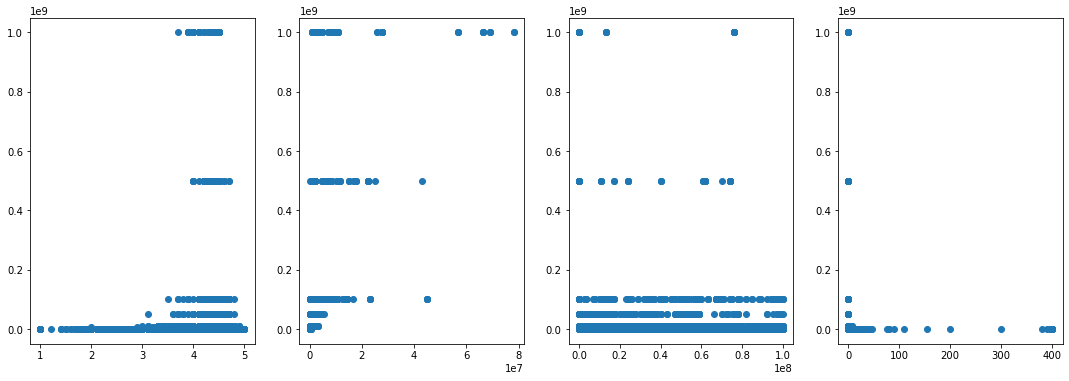

In [25]:
fig, axs = plt.subplots(1,4)
axs[0].scatter(year_df["Rating"], year_df["Installs"])
axs[1].scatter(year_df["Reviews"], year_df["Installs"])
axs[2].scatter(year_df["Size"], year_df["Installs"])
axs[3].scatter(year_df["Price"], year_df["Installs"])
fig.set_size_inches(18.5, 6)

- Lượng install trung bình qua các năm

<AxesSubplot:xlabel='Year'>

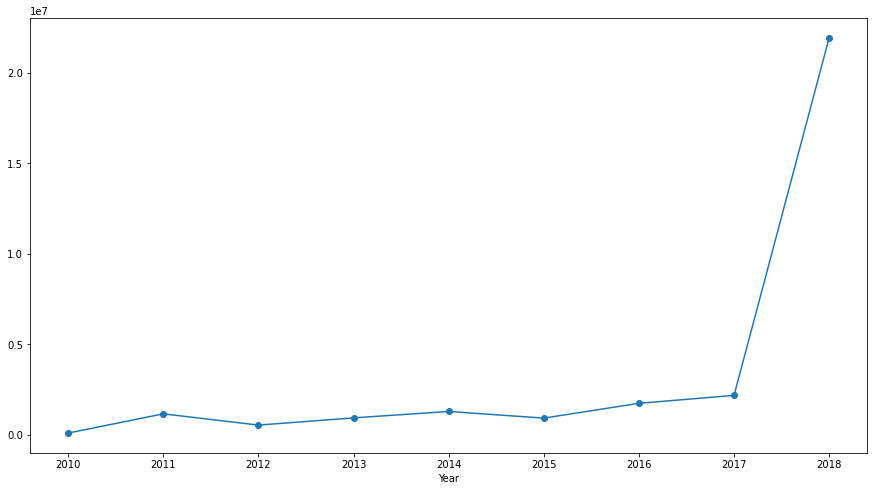

In [26]:
install_ysr = year_df.groupby("Year")["Installs"].mean()
install_ysr.plot(kind="line", marker = "o", figsize = (15,8))

`Nhận xét`: 
- Nhận thấy không thể qua quan sát bình thường có thể nhận thấy sự ảnh hưởng của các thuộc tính `Rating`, `Reviews`, `Size`, `Price` tới lượng `Installs`.
- Qua từng năm thì lượng Installs các ứng dụng càng ngày càng tăng vậy `Year` có phải ảnh hưởng lớn đến lượng Install không?

- Sử dụng thuật toán RandomForestClassifier để tìm ra tầm quan trọng của các thuộc tính ảnh hưởng đến lượng `Installs`

In [27]:
year_df = year_df.dropna()
y = year_df["Installs"]
x = year_df[["Rating", "Reviews", "Size", "Price", "Year"]]

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100]}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'n_estimators': [10, 50, 100]}, scoring='f1_macro')

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

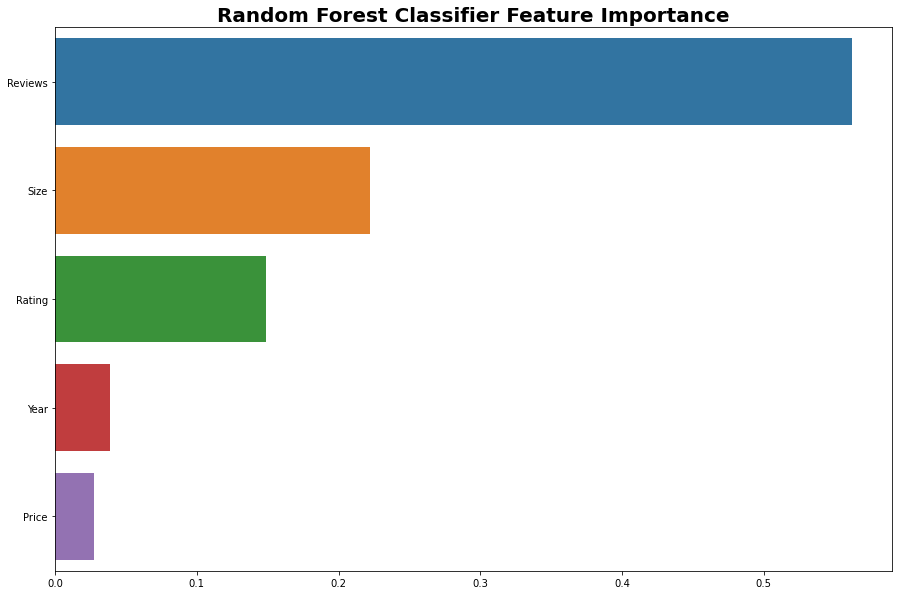

In [29]:
importances = pd.DataFrame(np.zeros((x.shape[1], 1)), columns=['importance'], index = x.columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=20, weight='bold')

`Nhận xét`:
- Quan sát kết quả của mô hình được xây dựng từ dữ liệu của chúng ta thì dường như 2 thuộc tính `Year` và `Price` không quá ảnh hưởng đến quyết định của người dùng, cụ thể ở đây là số lượt `Installs`.
- Thay vào đó thì số lượt `Reviews` lại có vẻ như đóng một vai trò rất quan trọng đối với yếu tố `Installs`.
- Vì vậy khi xây dựng và vận hành các ứng dụng, các nhà phát triển phải đặc biệt chú tâm tới các lượt `Reviews` thì ứng dụng của mình mới có thể phát triển tốt được.

## Tìm những ứng dụng được đánh giá tốt thông qua Review của khách hàng

- Đọc file dữ liệu `googleplaystore_user_reviews.csv`

In [30]:
df2 = pd.read_csv("data\googleplaystore_user_reviews.csv")
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


- Dữ liệu có bao nhiêu dòng, cột?

In [31]:
df2.shape

(64295, 5)

- Thông tin mỗi cột

File này là dữ liệu về các lượt đánh giá (`Reviews`) của các ứng dụng (đã phiên dịch sang tiếng anh) và các thông tin hữu ích được rút trích ra từ các lượt đánh giá đó. Đầu tiên ta tìm hiểu những cột có ý nghĩa còn mơ hồ:
- `Sentiment`: Là thái độ của người đánh giá dựa vào việc phân tích câu đánh giá, được phân làm 3 loại là Positive, Negative, Neutral.
- `Sentiment_Polarity`: Là thái độ của người đánh giá được chuyển về dạng số với giới hạn trong khoảng [-1, 1] với các giá trị càng gần -1 là càng tiêu cực và ngược lại càng về 1 là càng tích cực.
- `Sentiment_Subjectivity`: Là mức độ chủ quan trong lời đánh giá của người viết, giới hạn trong khoảng [0, 1] với các giá trị càng gần 1 thì mức độ chủ quan càng cao.

Công việc bây giờ của chúng ta là từ những cột giá trị trên để tìm hiểu xem những ứng dụng nào được xem là tốt nhất từ tất cả các lời đánh giá (`Reviews`) của người dùng.

- Tạo cột mới `Sentiment_Objectivity` để đánh giá Review đó có thực sự chính xác hay không?

Giá trị của cột này sẽ được coi là thái độ khách quan của người dùng đối với ứng dụng qua lời đánh giá.

In [32]:
df2.dropna(inplace=True)
df2["Sentiment_Objectivity"] = df2["Sentiment_Polarity"] / (df2["Sentiment_Subjectivity"]+0.000001)
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Objectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,1.874996
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,0.866664
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,0.457142
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,3.333322
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000,3.333322
...,...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,0.356164
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,0.503104
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,-1.149995
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,0.799999


- Ghép 2 DataFrame lại với nhau để lấy thông tin về thể loại của mỗi ứng dụng.

In [33]:
new_df = df2.merge(df, how = "left", on = "App")[["App", "Sentiment_Objectivity", "Category"]]
new_df = new_df.groupby(["App", "Category"])["Sentiment_Objectivity"].mean().reset_index()
new_df

,App,Category,Sentiment_Objectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,-102.148813
1,11st,SHOPPING,0.195005
2,1800 Contacts - Lens Store,MEDICAL,0.400902
3,1LINE – One Line with One Touch,GAME,0.304564
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,0.833469
...,...,...,...
843,Hotels.com: Book Hotel Rooms & Find Vacation D...,TRAVEL_AND_LOCAL,0.213013
844,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,0.456832
845,Hotstar,ENTERTAINMENT,0.053837
846,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,0.321771


- Sau đó ta sẽ hiển thị những ứng dụng được 'đánh giá tốt nhất' trong mỗi thể loại trong dữ liệu.

In [34]:
g = new_df.groupby("Category")
res = g.apply(lambda x: x.sort_values(by = "Sentiment_Objectivity", ascending=False).drop_duplicates(subset="App").head(1)["App"])
temp_df = pd.DataFrame(res)
temp_df = temp_df.reset_index().drop("level_1", axis=1).set_index("Category")
temp_df.T

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
App,"Canva: Poster, banner, card maker & graphic de...",AutoScout24 Switzerland – Find your new car,Hairstyles step by step,Golden Dictionary (EN-AR),Google My Business,DC Comics,Contacts+,"Chat Rooms, Avatars, Date - Galaxy",Edmodo,Amazon Prime Video,...,"APUS Launcher - Theme, Wallpaper, Hide Apps",Cameringo Lite. Filters Camera,AutoCAD - DWG Viewer & Editor,Flipp - Weekly Shopping,Badoo - Free Chat & Dating App,All Football - Latest News & Videos,App vault,Google Trips - Travel Planner,All Video Downloader 2018,APE Weather ( Live Forecast)


`Nhận xét`:
- Qua việc trả lời câu hỏi trên, ta có thể tìm được ứng dụng nào được xem là làm hài lòng người sử dụng nhất ở mỗi thể loại. Điều này sẽ có ích cho cả các nhà phát triển ứng dụng lẫn người sử dụng.
- Với những người lập trình, phát triển ứng dụng, khi cần xây dựng ứng dụng thuộc một thể loại nào đó. Người ta có thể tham khảo những ứng dụng được đánh giá cao để học hỏi.
- Còn với người sử dụng, khi có nhu cầu về một loại ứng dụng nào, có thể dễ dàng dựa vào đây để tìm sản phẩm phù hợp cho mình. Mà không phí thời gian, tiền của vào những ứng dụng không đáng.

`Nhận xét`:
- Ta thấy hiện nay trên thị trường thì lượng ứng dụng Free là chiếm phần lớn, nhiều hơn ứng dụng Paid rất nhiều.
- Về Size của cả 2 không chênh lệch.
- Về lượng Rating thì ta thấy ứng dụng Paid sẽ có tỉ lệ Rating cao hơn nhưng không nhiều.
- Hai yếu tố để thu về lợi nhuận là lượng Installs và Price thì với ứng dụng Free sẽ có lượng Installs trung bình cao hơn còn về Price thì ứng dụng Paid sẽ cao hơn.